In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [103]:
df = pd.read_csv('HR_comma_sep_LogisticRegression.csv')
df.head(25)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


In [104]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [105]:
df.satisfaction_level.min()

0.09

<Axes: xlabel='Department', ylabel='number_project'>

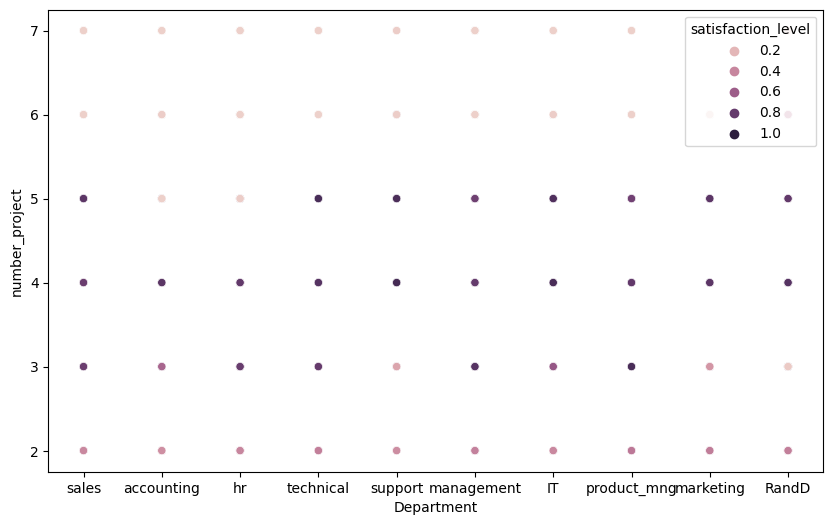

In [106]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Department', y='number_project', hue = 'satisfaction_level')

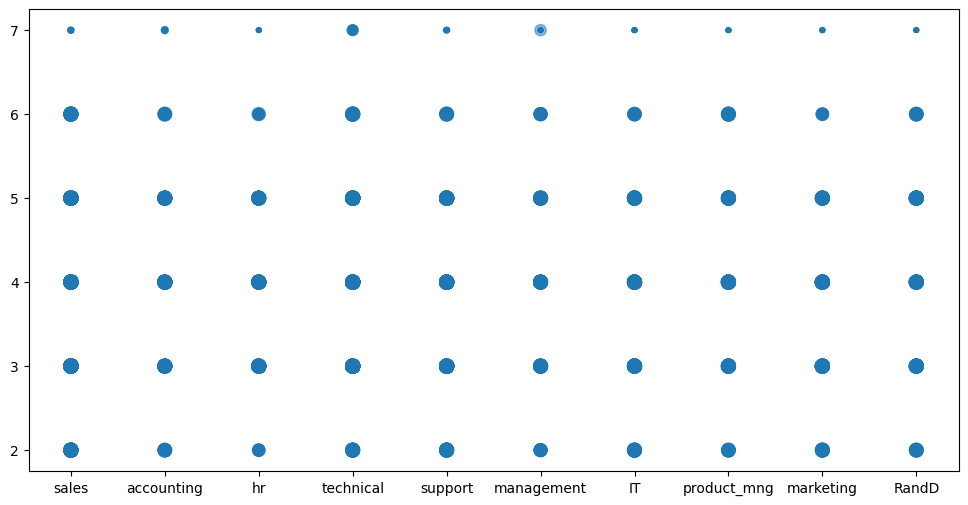

In [107]:
plt.figure(figsize=(12, 6))
plt.scatter(df.Department, df.number_project, s=df['satisfaction_level']*100, alpha = 0.5)

<Axes: xlabel='left', ylabel='salary'>

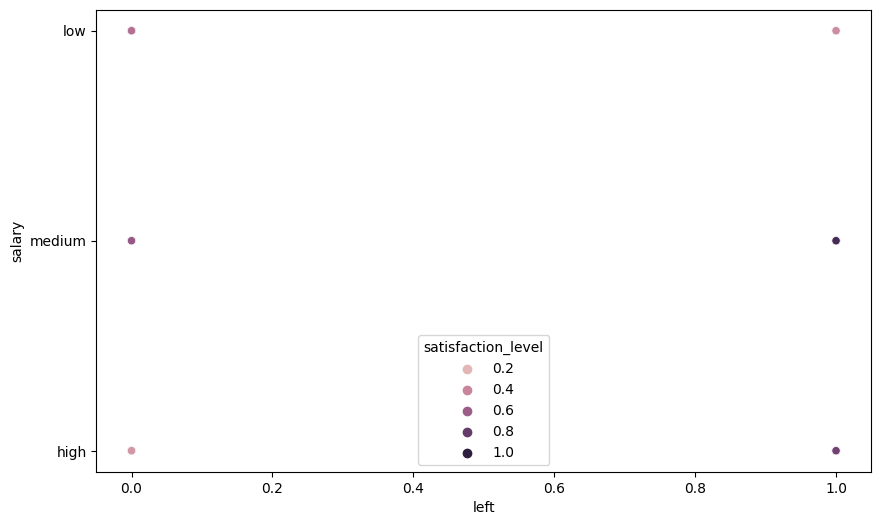

In [108]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='left', y='salary', hue = 'satisfaction_level')

<Axes: xlabel='salary', ylabel='left'>

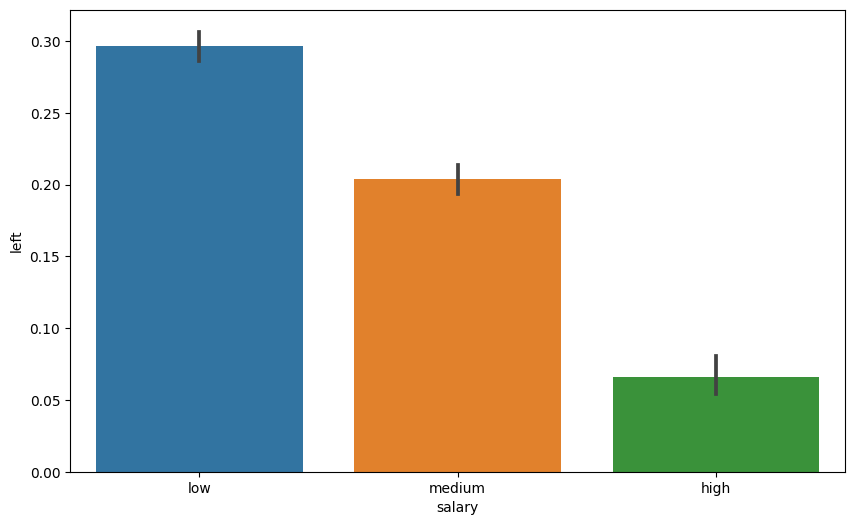

In [109]:
plt.figure(figsize=(10, 6))
# Bar plot using Seaborn
sns.barplot(y='left', x='salary', data=df)

In [110]:
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Department                object
salary                    object
dtype: object

In [111]:
from sklearn.preprocessing import LabelEncoder

df['salary'] = df['salary'].astype('str')
le = LabelEncoder()
df['salary'] = le.fit_transform(df['salary'])


In [112]:
print(df.tail(25))

       satisfaction_level  last_evaluation  number_project   
14974                0.36             0.54               2  \
14975                0.10             0.79               7   
14976                0.40             0.47               2   
14977                0.81             0.85               4   
14978                0.40             0.47               2   
14979                0.09             0.93               6   
14980                0.76             0.89               5   
14981                0.73             0.93               5   
14982                0.38             0.49               2   
14983                0.72             0.84               5   
14984                0.40             0.56               2   
14985                0.91             0.99               5   
14986                0.85             0.85               4   
14987                0.90             0.70               5   
14988                0.46             0.55               2   
14989   

<Axes: xlabel='Department', ylabel='salary'>

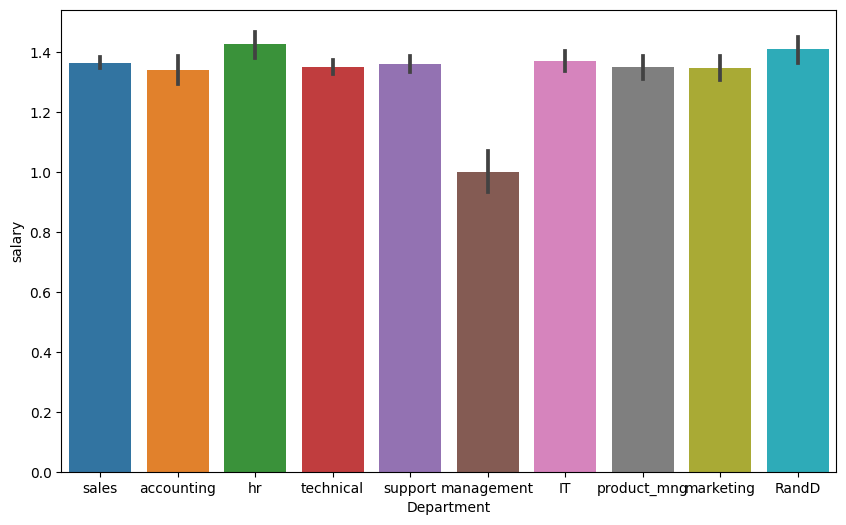

In [113]:
plt.figure(figsize=(10, 6))
# Bar plot using Seaborn
sns.barplot(y='salary', x='Department', data=df)

In [114]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
model = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(df[['satisfaction_level']],df.left,train_size=0.8)

In [115]:
model.fit(X_train, y_train)
y_predicted = model.predict(X_test)

In [116]:
y_predicted

array([0, 0, 1, ..., 0, 0, 1])

In [117]:
model.score(X_test,y_test)

0.773

In [118]:
df = pd.get_dummies(df, columns=['Department'])
df = pd.get_dummies(df, columns=['salary'])

In [119]:
X = df.drop('left', axis = 'columns')
y = df['left']

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.8)

In [127]:
logreg_model = LogisticRegression(max_iter=100000)

In [130]:
# when the below is executed, warning message come
# used scaled values (as below) to prevent overfitting, to minimize the difference between the predicted probabilities and the actual outcomes
# # model.fit(X_train, y_train)

In [131]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

logreg_model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=100000)

In [132]:
df.dtypes


satisfaction_level        float64
last_evaluation           float64
number_project              int64
average_montly_hours        int64
time_spend_company          int64
Work_accident               int64
left                        int64
promotion_last_5years       int64
Department_IT                bool
Department_RandD             bool
Department_accounting        bool
Department_hr                bool
Department_management        bool
Department_marketing         bool
Department_product_mng       bool
Department_sales             bool
Department_support           bool
Department_technical         bool
salary_0                     bool
salary_1                     bool
salary_2                     bool
dtype: object

In [134]:
# looks like the multivariate logistic regression improved the score
model.score(X_test,y_test)

0.7963333333333333